In [1]:
import pygame
import random 
import numpy as np
import pandas as pd
from dataclasses import dataclass
import matplotlib.pyplot as plt
import cv2

buffer = 5
screen_width, screen_height = 1000, 600

@dataclass
class BoundingBox:
    left: int
    top: int
    height: int
    width: int

class Target(pygame.sprite.Sprite):
    def __init__(self, image, x, y, points):
        super().__init__()
        self.image = image
        self.points = points
        self.rect = self.image.get_rect()
        self.rect.x = x
        self.rect.y = y
    
    def get_score(self):
        return self.points
    
def generate_targets(screen, group):
    xs, ys = get_offsets(screen, group, buffer)
    return pygame.sprite.Group(
        [Target(load_image('target.png', group['scale']), xs[i], ys[i], group['points']) for i in range(group['number'])]
    )

def ranks(sample):
    indices = sorted(range(len(sample)), key=lambda i: sample[i])
    return sorted(indices, key=lambda i: indices[i])

def sample(n=40, k=4, d=10):
    sample = random.sample(range(n-(k-1)*(d-1)), k)
    return np.array([s + (d-1)*r for s, r in zip(sample, ranks(sample))])

def get_offsets(screen, group, buffer=10):
    return (sample(screen.get_width() - group['scale'] - buffer, group['number'], group['scale']), 
            np.array(np.random.rand(group['number']) * screen.get_height(), dtype=int))

def load_image(path, scale):
    return pygame.transform.scale(pygame.image.load(path).convert_alpha(), (scale, scale))

def generate_groups(screen, config):
    return [generate_targets(screen, params) for group, params in config.items()]

def check_hit(target_group, position, score):
    for target in target_group:
        if target.rect.collidepoint(position[0], position[1]):
            score += target.get_score()
            target_group.remove(target)
    return score

def get_count(targets):
    count = 0
    for group in targets:
        count += len(group.sprites())
    return count    


from dataclasses import dataclass

@dataclass
class BoundingBox:
    left: int
    top: int
    height: int
    width: int
        
def create_bboxes(targets):
    df = pd.DataFrame([
        BoundingBox(target.rect.left / screen_width, target.rect.top / screen_height, target.rect.height / screen_height, target.rect.width / screen_width)
    for group in targets
    for target in group])
    df.to_csv(f'bboxes/bboxes_{running}.csv', index=False)
    

pygame 2.3.0 (SDL 2.24.2, Python 3.11.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:

# Initialize Pygame
pygame.init()
clock = pygame.time.Clock()
font = pygame.font.Font(None, 36)
screen = pygame.display.set_mode((screen_width, screen_height))

background_image = pygame.transform.scale(pygame.image.load("background.jpg").convert(), (screen_width, screen_height))

crosshair_image = pygame.transform.scale(pygame.image.load('crosshair.png'), (int(.3*screen_width), int(.3*screen_width)))
crosshair_rect = crosshair_image.get_rect()
pygame.mouse.set_visible(False)

score = 0
running = 0
while running < 5:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = 10
    
    config = {

    "large": {
        "number": np.random.randint(0, 5),
        "scale": int(.15*screen_width),
        "points": 10
        },
    "medium": {
        "number": np.random.randint(0, 6),
        "scale": int(.07*screen_width),
        "points": 25
        },
    "small": {
        "number": np.random.randint(0, 5),
        "scale": int(.05*screen_width),
        "points": 30
        }
    }
    
    targets = generate_groups(screen, config)
    screen.blit(background_image, (0,0))
    
    for group in targets:
        group.draw(screen)
    for group in targets:
        group.update()
        
    screen.blit(font.render("Score: " + str(score), True, (255, 255, 255)), (10, 10))
    pygame.display.update()
    clock.tick(60)
    
    create_bboxes(targets)
    pygame.image.save(screen, f"images/screenshot_{running}.png")
    running += 1


# Quit Pygame
pygame.quit()




In [3]:
from matplotlib.patches import Rectangle

In [4]:
df = pd.read_csv('bboxes/bboxes_0.csv')
rects = [
    Rectangle((df['left'].iloc[i] * screen_width, df['top'].iloc[i] * screen_height),
             df['width'].iloc[i] * screen_width,
             df['height'].iloc[i] * screen_height, fill=False, color='y') for i in range(len(df))
        ]

In [5]:
rects

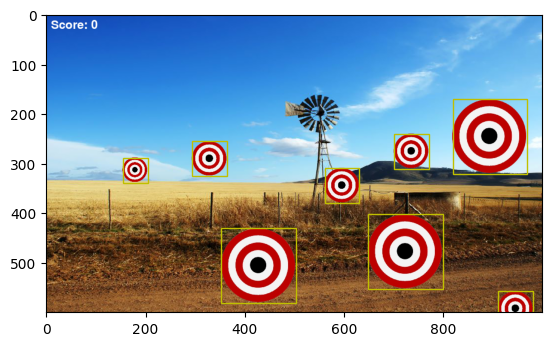

In [6]:
image = cv2.cvtColor(cv2.imread('images/screenshot_0.png'), cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(image)
for rect in rects:
    ax.add_patch(rect)
plt.show()

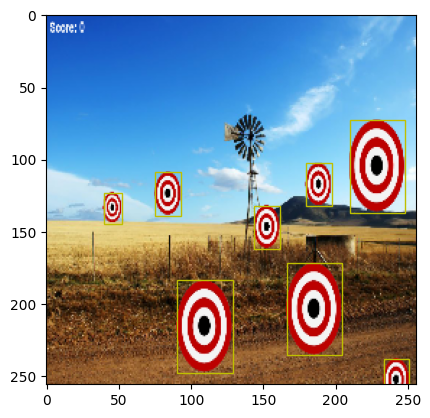

In [7]:
screen_width, screen_height = 256, 256
image = cv2.resize(cv2.cvtColor(cv2.imread('images/screenshot_0.png'), cv2.COLOR_BGR2RGB), (screen_width, screen_height))
rects = [
    Rectangle((df['left'].iloc[i] * screen_width, df['top'].iloc[i] * screen_height),
             df['width'].iloc[i] * screen_width,
             df['height'].iloc[i] * screen_height, fill=False, color='y') for i in range(len(df))
        ]
fig, ax = plt.subplots()
ax.imshow(image)
for rect in rects:
    ax.add_patch(rect)
plt.show()